In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import plotly.graph_objects as go
from scipy.stats import poisson

In [3]:
all_dmv = pd.read_csv('datasets/vehicle_fuel_type.csv')
all_dmv.columns = all_dmv.columns.str.replace(" ", "_")
all_dmv.head()

/var/folders/54/hwsm49bs033bpdy18h8fnp2h0000gn/T/ipykernel_4178/3180194298.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  all_dmv = pd.read_csv('datasets/vehicle_fuel_type.csv')


,_id,Date,Zip_Code,Model_Year,Fuel,Make,Duty,Vehicles
0,1,10/1/2018,90000,2006,Gasoline,OTHER/UNK,Light,1
1,2,10/1/2018,90000,2014,Gasoline,OTHER/UNK,Light,1
2,3,10/1/2018,90000,2016,Gasoline,OTHER/UNK,Light,1
3,4,10/1/2018,90000,2017,Gasoline,OTHER/UNK,Light,1
4,5,10/1/2018,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Heavy,55


In [4]:
all_dmv['Date'].value_counts()

12/31/2022    767054
1/1/2022      722465
1/1/2021      677969
1/1/2020      602394
10/1/2018     586233
12/31/2023    499623
Name: Date, dtype: int64

In [28]:
sdge_zip_csv = pd.read_csv('datasets/SDGE_zip.csv')
sdge_service_zip = sdge_zip_csv['ZipCode']

In [29]:
all_dmv['Zip_Code'] = all_dmv['Zip_Code'].astype(str).str.strip()
sdge_service_zip = sdge_service_zip.astype(str).str.strip()

In [30]:
SDGE_dmv = all_dmv[(all_dmv['Zip_Code'].isin(sdge_service_zip)) & (all_dmv['Fuel'] == 'Battery Electric')]
SDGE_dmv

,_id,Date,Zip_Code,Model_Year,Fuel,Make,Duty,Vehicles
139342,139343,10/1/2018,91901,2011,Battery Electric,OTHER/UNK,Light,3
139366,139367,10/1/2018,91901,2012,Battery Electric,OTHER/UNK,Light,3
139390,139391,10/1/2018,91901,2013,Battery Electric,OTHER/UNK,Light,5
139420,139421,10/1/2018,91901,2014,Battery Electric,OTHER/UNK,Light,7
139452,139453,10/1/2018,91901,2015,Battery Electric,OTHER/UNK,Light,5
...,...,...,...,...,...,...,...,...
3855195,499081,12/31/2023,91978,2014,Battery Electric,OTHER/UNK,Light,3
3855209,499095,12/31/2023,92106,2022,Battery Electric,RIVIAN,Light,14
3855291,499177,12/31/2023,91902,2012,Battery Electric,OTHER/UNK,Light,1
3855292,499178,12/31/2023,92110,2012,Battery Electric,OTHER/UNK,Light,2


In [31]:
# Function to set a Year column for each date to organize DMV data
def map_date_to_year(date):
    if date == "12/31/2022":
        return 2022
    elif date == "1/1/2022":
        return 2021
    elif date == "1/1/2021":
        return 2020
    elif date == "1/1/2020":
        return 2019
    elif date == "10/1/2018":
        return 2018
    elif date == "12/31/2023":
        return 2023
    else:
        return None  # Handle unexpected or missing values

In [32]:
# Apply the function to the 'Date' column to create the new 'Year' column
SDGE_dmv['Year'] = SDGE_dmv['Date'].apply(map_date_to_year)

/var/folders/54/hwsm49bs033bpdy18h8fnp2h0000gn/T/ipykernel_4178/1257133320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDGE_dmv['Year'] = SDGE_dmv['Date'].apply(map_date_to_year)


In [33]:
SDGE_dmv['Date'].value_counts()

12/31/2023    3136
12/31/2022    2765
1/1/2022      2228
1/1/2021      1832
10/1/2018     1676
1/1/2020      1616
Name: Date, dtype: int64

In [34]:
SDGE_dmv['Year'].value_counts()

2023    3136
2022    2765
2021    2228
2020    1832
2018    1676
2019    1616
Name: Year, dtype: int64

In [35]:
SDGE_dmv.head()

,_id,Date,Zip_Code,Model_Year,Fuel,Make,Duty,Vehicles,Year
139342,139343,10/1/2018,91901,2011,Battery Electric,OTHER/UNK,Light,3,2018
139366,139367,10/1/2018,91901,2012,Battery Electric,OTHER/UNK,Light,3,2018
139390,139391,10/1/2018,91901,2013,Battery Electric,OTHER/UNK,Light,5,2018
139420,139421,10/1/2018,91901,2014,Battery Electric,OTHER/UNK,Light,7,2018
139452,139453,10/1/2018,91901,2015,Battery Electric,OTHER/UNK,Light,5,2018


## Top 20 ZIP Codes with Highest Number Of EVs

In [36]:
vehicles_by_zip = SDGE_dmv.groupby('Zip_Code')['Vehicles'].sum().sort_values(ascending=False).reset_index()
vehicles_by_zip.columns = ['zip', 'ev_owners']
vehicles_by_zip

,zip,ev_owners
0,92130,18727
1,92127,13901
2,92677,11928
3,92024,9944
4,92694,9757
...,...,...
134,92066,6
135,92134,3
136,91948,2
137,92155,2


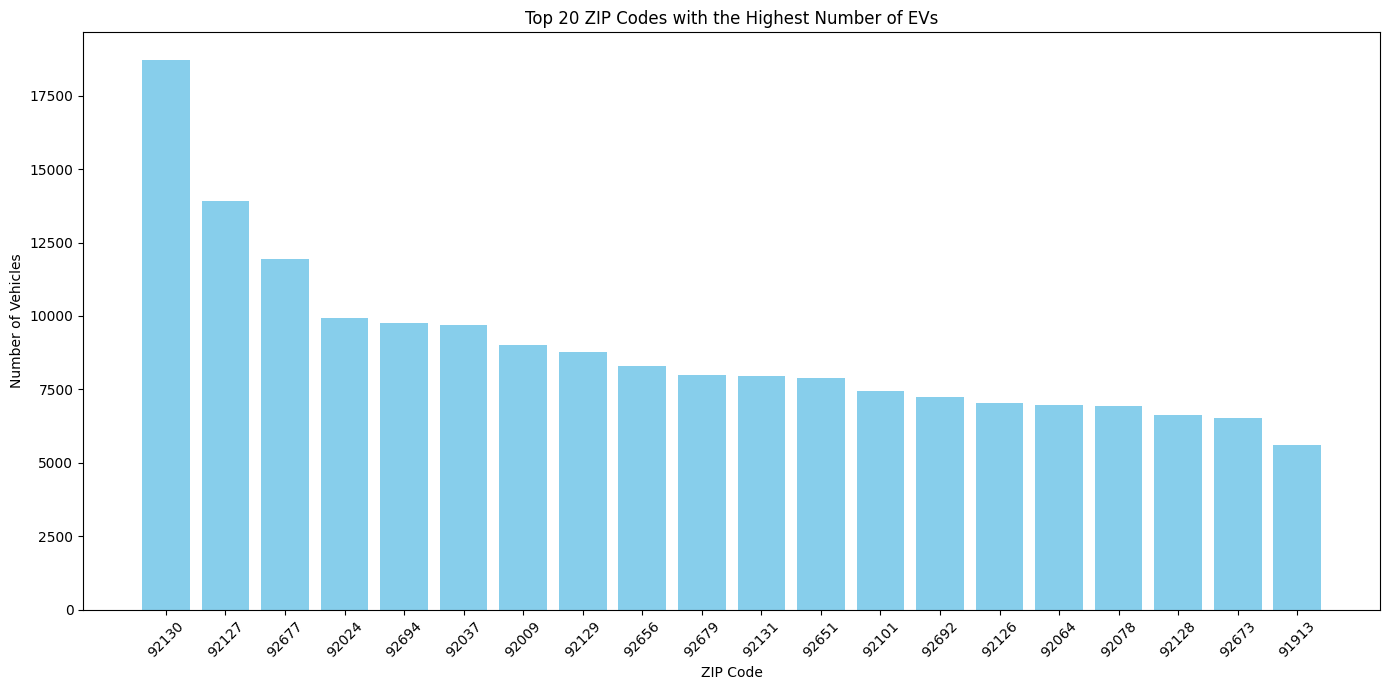

In [37]:
# Create a bar plot for the top 20 ZIP Codes with the highest number of vehicles
plt.figure(figsize=(14, 7))
top_20 = vehicles_by_zip.head(20)
plt.bar(top_20['zip'], top_20['ev_owners'], color='skyblue')
plt.title('Top 20 ZIP Codes with the Highest Number of EVs')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Total EV Count Per Year From 2018 - 2023

In [38]:
# Group data by YEAR and sum the number of EVs
ev_distribution_by_year = SDGE_dmv.groupby('Year')['Vehicles'].sum().sort_index()
ev_distribution_by_year

Year
2018     26460
2019     34187
2020     44014
2021     62373
2022     90455
2023    130954
Name: Vehicles, dtype: int64

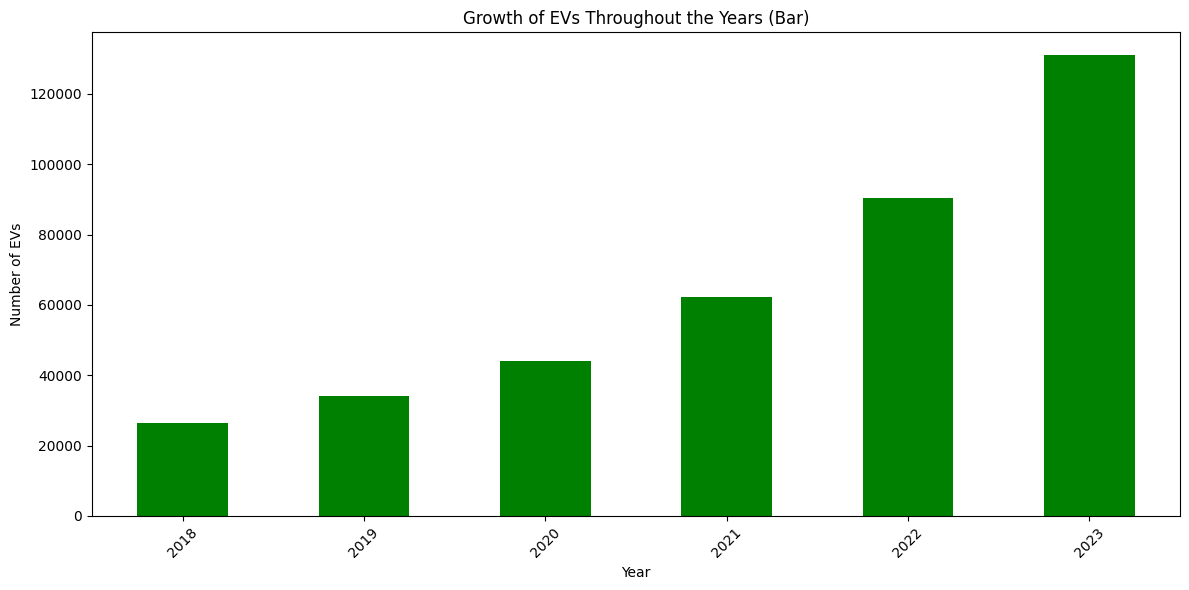

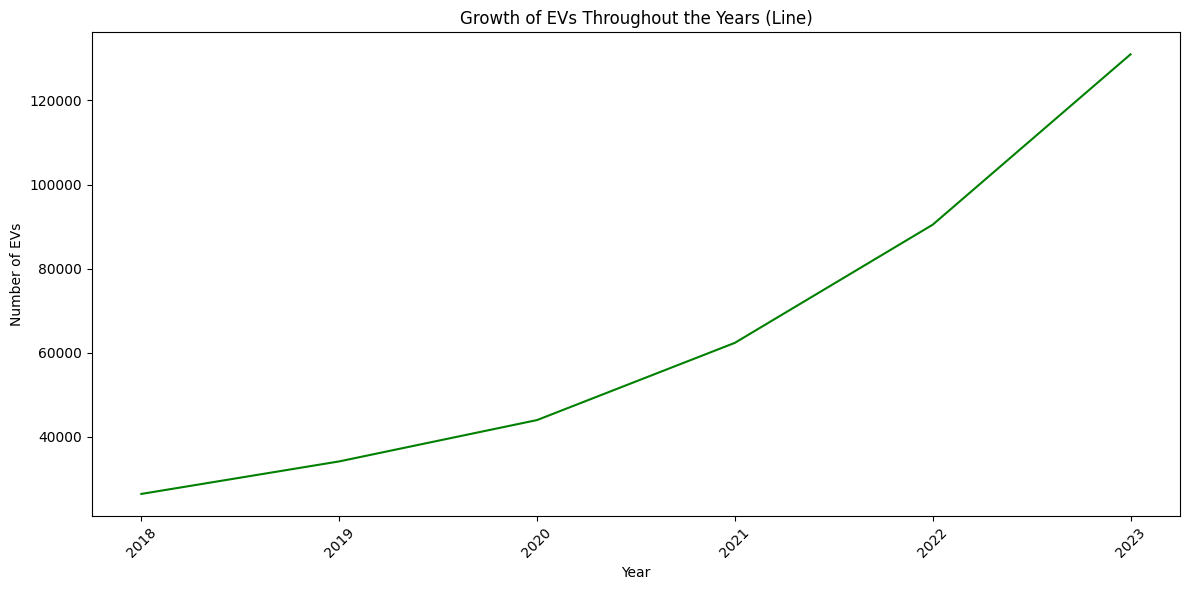

In [39]:
# Create a bar plot for the distribution of EVs throughout the years
plt.figure(figsize=(12, 6))
ev_distribution_by_year.plot(kind='bar', color='green')
plt.title('Growth of EVs Throughout the Years (Bar)')
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6))
ev_distribution_by_year.plot(kind='line', color='green')
plt.title('Growth of EVs Throughout the Years (Line)')
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Count of New EV Registered Per Year From 2018 - 2023

In [40]:
yearly_growth = ev_distribution_by_year.diff()
growth_labels = [f"{year1} - {year2}" for year1, year2 in zip(ev_distribution_by_year.index[:-1], ev_distribution_by_year.index[1:])]

yearly_growth_df = pd.DataFrame(
    {"Label" : growth_labels,
    "Yearly Growth": yearly_growth[1:]}
)
yearly_growth_df.set_index("Label")

,Yearly Growth
Label,
2018 - 2019,7727.0
2019 - 2020,9827.0
2020 - 2021,18359.0
2021 - 2022,28082.0
2022 - 2023,40499.0


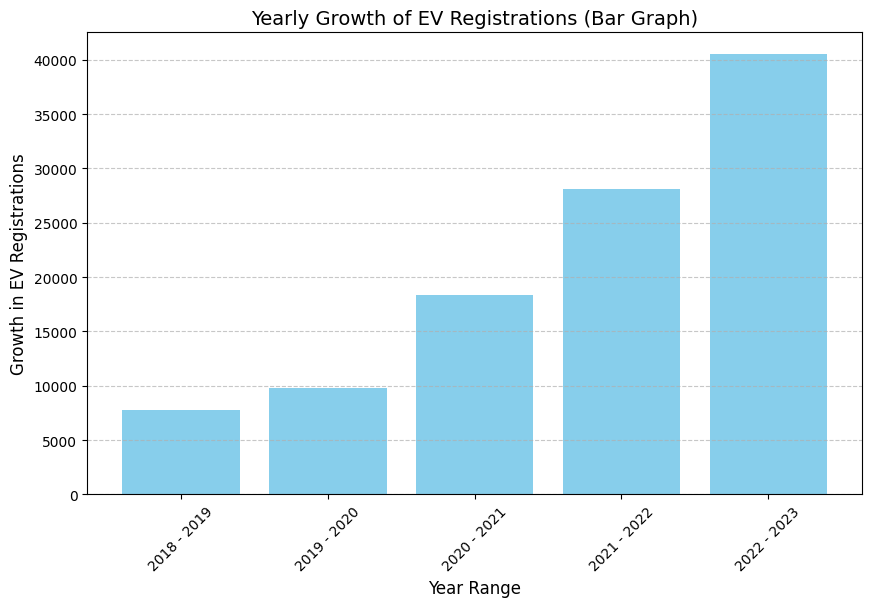

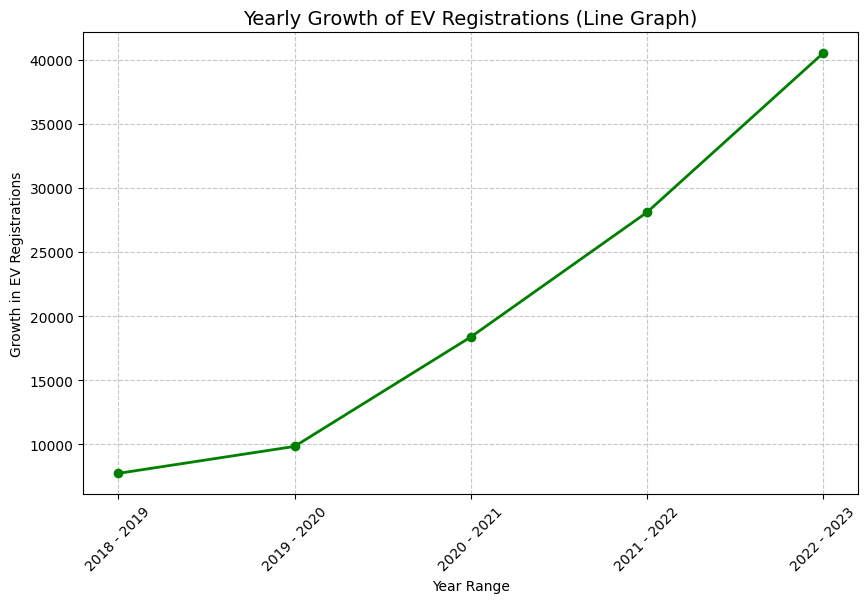

In [41]:
# Bar Graph for Yearly Growth with Custom Labels
plt.figure(figsize=(10, 6))
plt.bar(yearly_growth_df["Label"], yearly_growth_df["Yearly Growth"], color='skyblue')
plt.title("Yearly Growth of EV Registrations (Bar Graph)", fontsize=14)
plt.xlabel("Year Range", fontsize=12)
plt.ylabel("Growth in EV Registrations", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Line Graph for Yearly Growth with Custom Labels
plt.figure(figsize=(10, 6))
plt.plot(yearly_growth_df["Label"], yearly_growth_df["Yearly Growth"], marker='o', linestyle='-', color='green', linewidth=2)
plt.title("Yearly Growth of EV Registrations (Line Graph)", fontsize=14)
plt.xlabel("Year Range")
plt.ylabel("Growth in EV Registrations")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

## Scatter Plotting the Correlation Between EV Counts and Charging Stations in SDGE Territories

In [42]:
sdge_zip_csv = pd.read_csv('datasets/SDGE_zip.csv')
sdge_service_zip = sdge_zip_csv['ZipCode']
alternative_fuels_data = pd.read_csv('datasets/alternative_fuels_data.csv')
enhanced_columns = [
    'station_name', 'city', 'state', 'zip', 'country', 'access_code',
    'latitude', 'longitude', 'fuel_type_code', 'status_code', 'open_date',
    'ev_connector_types', 'ev_dc_fast_num', 'ev_level1_evse_num',
    'ev_level2_evse_num', 'ev_network', 'ev_network_web', 'ev_other_evse',
    'ev_workplace_charging', 'ev_pricing'
]
alternative_fuels_data = alternative_fuels_data[enhanced_columns]

/var/folders/54/hwsm49bs033bpdy18h8fnp2h0000gn/T/ipykernel_4178/755191607.py:3: DtypeWarning: Columns (14,28,29,33,34,43,46,50,51,52,53,54,55,56,60,62,63,66,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  alternative_fuels_data = pd.read_csv('datasets/alternative_fuels_data.csv')


In [43]:
charging_station_data = alternative_fuels_data[(alternative_fuels_data['zip'].isin(sdge_service_zip)) & (alternative_fuels_data['fuel_type_code'] == 'ELEC')]
charging_station_data

,station_name,city,state,zip,country,access_code,latitude,longitude,fuel_type_code,status_code,open_date,ev_connector_types,ev_dc_fast_num,ev_level1_evse_num,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_workplace_charging,ev_pricing
136,Scripps Green Hospital,La Jolla,CA,92037,US,public,32.899470,-117.243000,ELEC,E,1997-07-30,['J1772'],NaN,NaN,1.0,Non-Networked,NaN,NaN,False,Free; parking fee
3091,Mossy Nissan - El Cajon,El Cajon,CA,92020,US,public,32.795896,-116.976156,ELEC,E,2011-03-15,['J1772'],NaN,NaN,1.0,Non-Networked,NaN,NaN,False,Free
3094,Mossy Nissan - Escondido,Escondido,CA,92029,US,public,33.116492,-117.106837,ELEC,E,2011-03-15,['J1772'],NaN,NaN,1.0,Non-Networked,NaN,NaN,False,Free
3118,Mossy Nissan,National City,CA,91950,US,public,32.659001,-117.100836,ELEC,E,2011-03-15,['J1772'],NaN,NaN,1.0,Non-Networked,NaN,NaN,False,Free
3119,Mossy Nissan - Oceanside,Oceanside,CA,92056,US,public,33.181953,-117.298334,ELEC,E,2011-03-15,"['CHADEMO', 'J1772', 'J1772COMBO']",3.0,NaN,2.0,Non-Networked,NaN,NaN,False,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93765,Pala Administration,Pala,CA,92059,US,public,33.364270,-117.087110,ELEC,P,2025-01-01,"['CHADEMO', 'J1772', 'J1772COMBO']",6.0,NaN,6.0,Non-Networked,NaN,NaN,False,$0.65 per kWh
93883,DGS RAMONA CENTER 2,Ramona,CA,92065,US,public,33.040529,-116.872571,ELEC,E,2024-11-23,['J1772'],NaN,NaN,2.0,ChargePoint Network,http://www.chargepoint.com/,NaN,False,NaN
93884,DGS RAMONA CENTER 1,Ramona,CA,92065,US,public,33.040545,-116.872535,ELEC,E,2024-11-23,['J1772'],NaN,NaN,2.0,ChargePoint Network,http://www.chargepoint.com/,NaN,False,NaN
93892,BROADCOM SD 16340 01,San Diego,CA,92127,US,public,33.012795,-117.091313,ELEC,E,2024-11-23,['J1772'],NaN,NaN,2.0,ChargePoint Network,http://www.chargepoint.com/,NaN,False,NaN


In [44]:
# Ensure ZIP codes are strings for consistent merging
SDGE_dmv['Zip_Code'] = SDGE_dmv['Zip_Code'].astype(str)
charging_station_data['zip'] = charging_station_data['zip'].astype(str)

# Filter and count EV charging stations by ZIP code for electric fuel type
charging_stations_by_zip = charging_station_data[charging_station_data['fuel_type_code'] == 'ELEC'].groupby('zip').size().reset_index(name='charger_count')

# Merge EV owners and charging station counts by ZIP code
ev_zip_data = pd.merge(vehicles_by_zip, charging_stations_by_zip, on='zip', how='inner')

# Prepare regression model
X = ev_zip_data['ev_owners']
y = ev_zip_data['charger_count']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
predictions = model.predict(X_const)

### Plotly: Interactive Scatter Plot with ZIP Codes in Hover Info ###
fig = go.Figure()

# Add scatter plot with ZIP codes in hover text
fig.add_trace(go.Scatter(
    x=ev_zip_data['ev_owners'], 
    y=ev_zip_data['charger_count'], 
    mode='markers', 
    marker=dict(size=10, opacity=0.7), 
    name='Data points',
    text=ev_zip_data['zip'],  # Add ZIP codes as hover text
    hovertemplate=(
        "<b>ZIP Code:</b> %{text}<br>" +  # Add ZIP code to the hover template
        "<b>EV Owners:</b> %{x}<br>" +  # EV owners count
        "<b>Charging Stations:</b> %{y}<br><extra></extra>"  # Charger count
    )
))

# Add regression line
fig.add_trace(go.Scatter(
    x=ev_zip_data['ev_owners'], 
    y=predictions, 
    mode='lines', 
    line=dict(color='red', width=2), 
    name='Regression line'
))

# Customize layout
fig.update_layout(
    title='Correlation between EV Owners and Charging Stations',
    xaxis_title='Number of EV Owners',
    yaxis_title='Number of EV Charging Stations',
    width=1000,
    height=700
)

fig.show()


/var/folders/54/hwsm49bs033bpdy18h8fnp2h0000gn/T/ipykernel_4178/1726552490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDGE_dmv['Zip_Code'] = SDGE_dmv['Zip_Code'].astype(str)
/var/folders/54/hwsm49bs033bpdy18h8fnp2h0000gn/T/ipykernel_4178/1726552490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_station_data['zip'] = charging_station_data['zip'].astype(str)


## Fitting Poisson Distribution On EV Owner Data 

In [45]:
# Group data by ZIP code and year
ev_count_by_zip_year = SDGE_dmv.groupby(['Zip_Code', 'Year'])['Vehicles'].sum().reset_index()

# Pivot to create a table for Poisson fitting
pivot_table = ev_count_by_zip_year.pivot(index='Year', columns='Zip_Code', values='Vehicles').fillna(0)

# Prepare to store results
poisson_results = []

# Fit Poisson distribution for each ZIP code
for zip_code in pivot_table.columns:
    ev_counts = pivot_table[zip_code]
    
    # Only fit if there are data points
    if ev_counts.sum() > 0:
        # Fit Poisson using Maximum Likelihood Estimation (MLE)
        model = sm.GLM(ev_counts, np.ones_like(ev_counts), family=sm.families.Poisson())
        result = model.fit()
        
        # Get the lambda (mean of Poisson)
        lambda_estimate = result.mu.mean()
        poisson_results.append({'zip': zip_code, 'lambda': lambda_estimate})

# Convert results to DataFrame
poisson_results_df = pd.DataFrame(poisson_results)

# Save the results to a CSV file
poisson_results_df.to_csv('poisson_results_sdge.csv', index=False)

# Print the first few rows of the results
print(poisson_results_df.head())

     zip      lambda
0  91901  161.833333
1  91902  259.500000
2  91905    4.000000
3  91906   16.166667
4  91910  536.333333


## Monte Carlo Simulation

In [46]:
# Monte Carlo simulation
n_samples = 1000
samples_results = {}

# Extract lambda values for each ZIP code
poisson_params = poisson_results_df.set_index('zip')['lambda'].to_dict()

# Perform sampling
for n in range(n_samples):
    results = []
    for zip_code in poisson_params.keys():
        # Sample from Poisson distribution
        value = poisson.rvs(mu=poisson_params[zip_code], size=1)
        results.append(value[0])
    samples_results[n] = results

# Convert sampling results to DataFrame for analysis
samples_df = pd.DataFrame.from_dict(samples_results, orient='index', columns=poisson_params.keys())

# Save sampled results to a CSV
samples_df.to_csv('poisson_samples.csv', index=False)


In [47]:
poisson_params

{'91901': 161.83333333334915,
 '91902': 259.5000000000186,
 '91905': 4.000000000120957,
 '91906': 16.166666666699893,
 '91910': 536.3333333334258,
 '91911': 341.0000000000004,
 '91912': 5.500000000000228,
 '91913': 933.5000000000015,
 '91914': 405.5000000000569,
 '91915': 606.3333333333335,
 '91916': 11.666666666669231,
 '91917': 6.166666666671808,
 '91931': 1.833333333520171,
 '91932': 109.16666666666795,
 '91934': 4.166666666666756,
 '91935': 146.6666666666745,
 '91941': 498.8333333333371,
 '91942': 314.5000000001141,
 '91945': 144.00000000063145,
 '91948': 0.33333333333333365,
 '91950': 165.33333333360767,
 '91962': 15.166666667446597,
 '91963': 2.1666666668845704,
 '91977': 344.8333333333334,
 '91978': 97.16666666666679,
 '91980': 2.0000000000000964,
 '92003': 108.00000000000522,
 '92004': 20.3333333333334,
 '92007': 296.66666666666765,
 '92008': 585.8333333333368,
 '92009': 1499.500000000017,
 '92010': 454.66666666670784,
 '92011': 745.1666666666791,
 '92014': 749.1666666666682,
 

In [48]:
samples_df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
91901,171,173,155,158,152,165,135,173,153,176,...,142,170,170,158,163,172,144,183,142,177
91902,298,280,241,234,255,301,261,281,262,271,...,256,242,245,240,275,263,255,283,264,234
91905,7,3,1,5,2,2,5,7,1,3,...,4,2,3,6,1,2,6,6,3,6
91906,15,13,18,15,22,15,18,12,16,13,...,14,16,18,20,18,20,16,13,17,26
91910,525,587,513,509,546,529,541,530,576,510,...,554,554,512,541,528,497,596,530,499,610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92690,15,10,9,9,11,10,8,8,8,6,...,13,8,5,6,11,7,5,6,2,12
92691,833,858,862,860,860,884,851,857,947,859,...,931,859,882,882,907,872,891,877,862,882
92692,1172,1124,1196,1190,1251,1278,1177,1198,1172,1198,...,1249,1239,1186,1183,1132,1165,1227,1237,1188,1255
92693,2,0,1,2,0,1,2,4,2,0,...,0,0,1,2,3,2,1,0,2,1


In [49]:
samples_df.sum()

91901     161685
91902     260157
91905       4116
91906      16260
91910     536937
          ...   
92690       7114
92691     878625
92692    1205435
92693       1398
92694    1626228
Length: 139, dtype: int64

In [50]:
samples_df.T.sum()

0      64717
1      64920
2      64356
3      64588
4      64815
       ...  
995    64676
996    64788
997    64896
998    64988
999    64961
Length: 1000, dtype: int64

In [51]:
samples_df.std()

91901    12.980380
91902    16.051168
91905     2.091631
91906     4.033444
91910    24.614486
           ...    
92690     2.640450
92691    30.158613
92692    34.915912
92693     1.174298
92694    40.555181
Length: 139, dtype: float64

## Visualization For Monte Carlo Simulation of Zip Code 92122

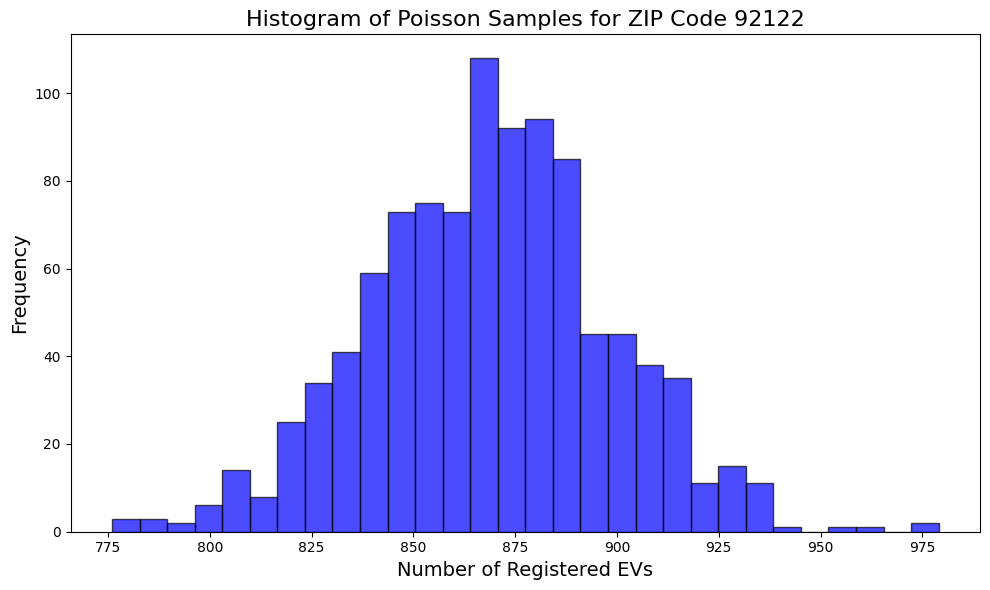

In [52]:
import matplotlib.pyplot as plt

# Choose a ZIP code to plot the histogram
zip_code_to_plot = '92122'  # Replace with desired ZIP code if known

# Extract samples for the chosen ZIP code
zip_samples = samples_df[zip_code_to_plot]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(zip_samples, bins=30, alpha=0.7, color='blue', edgecolor='black')

# Add labels and title
plt.title(f'Histogram of Poisson Samples for ZIP Code {zip_code_to_plot}', fontsize=16)
plt.xlabel('Number of Registered EVs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()